In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset and its analysis

In [3]:
df = pd.read_csv("Indian_housing_Delhi_data.csv")

In [4]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [5]:
df = df.drop(["city","latitude","longitude","currency","isNegotiable","priceSqFt","verificationDate","description","SecurityDeposit"],axis=1)

In [6]:
df.head()

,house_type,house_size,location,price,numBathrooms,numBalconies,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_type    5000 non-null   object 
 1   house_size    5000 non-null   object 
 2   location      5000 non-null   object 
 3   price         5000 non-null   int64  
 4   numBathrooms  4975 non-null   float64
 5   numBalconies  2737 non-null   float64
 6   Status        5000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 273.6+ KB


# Creating a new column named bhk

In [8]:
df["bhk"]=df["house_type"].str.extract(r'(\d+)').astype(int)

In [9]:
df.head()

,house_type,house_size,location,price,numBathrooms,numBalconies,Status,bhk
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished,3
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2


# Creating different columns from the house_type column

In [10]:
df["Type"]=df["house_type"].str.split().str[-1]

In [11]:
df.head()

,house_type,house_size,location,price,numBathrooms,numBalconies,Status,bhk,Type
0,1 RK Studio Apartment,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor
3,3 BHK Independent House,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished,3,House
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment


In [12]:
df = df.drop(["house_type"],axis=1)

In [13]:
df.head()

,house_size,location,price,numBathrooms,numBalconies,Status,bhk,Type
0,400 sq ft,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment
1,400 sq ft,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment
2,500 sq ft,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor
3,"1,020 sq ft",Model Town,48000,3.0,NaN,Furnished,3,House
4,810 sq ft,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment


# Extracting numerical value from house_size column 

In [14]:
df["Size"]=df["house_size"].str.extract(r'(\d+)').astype("float")

In [15]:
df = df.drop(["house_size"],axis=1)

In [16]:
df.head()

,location,price,numBathrooms,numBalconies,Status,bhk,Type,Size
0,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment,400.0
1,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment,400.0
2,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor,500.0
3,Model Town,48000,3.0,NaN,Furnished,3,House,1.0
4,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment,810.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      5000 non-null   object 
 1   price         5000 non-null   int64  
 2   numBathrooms  4975 non-null   float64
 3   numBalconies  2737 non-null   float64
 4   Status        5000 non-null   object 
 5   bhk           5000 non-null   int32  
 6   Type          5000 non-null   object 
 7   Size          5000 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 293.1+ KB


# Filling null values of bathrooms and balconies

In [18]:
df["bath"]=df["numBathrooms"].fillna(df["bhk"])
df["balcony"]=df["numBalconies"].fillna(df["bhk"])

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

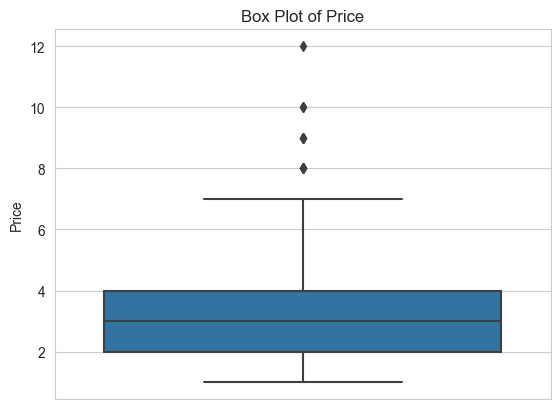

In [20]:
#box plot for bhk column 
sns.set_style("whitegrid")
sns.boxplot(data=df, y='bhk')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

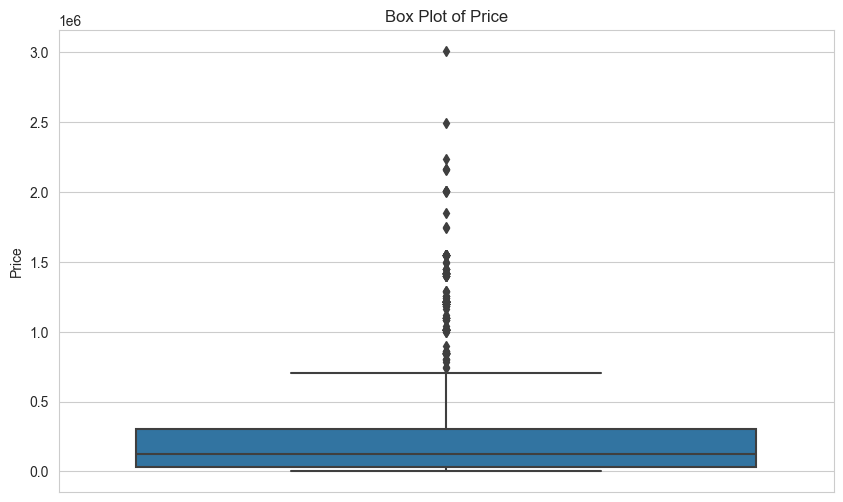

In [21]:
#box plot for price column
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

# Removing the outliers

In [22]:
q1=df["price"].quantile(0.25)
q3=df["price"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers=(df["price"] < lower_bound ) | (df["price"] > upper_bound)
df=df[~outliers]

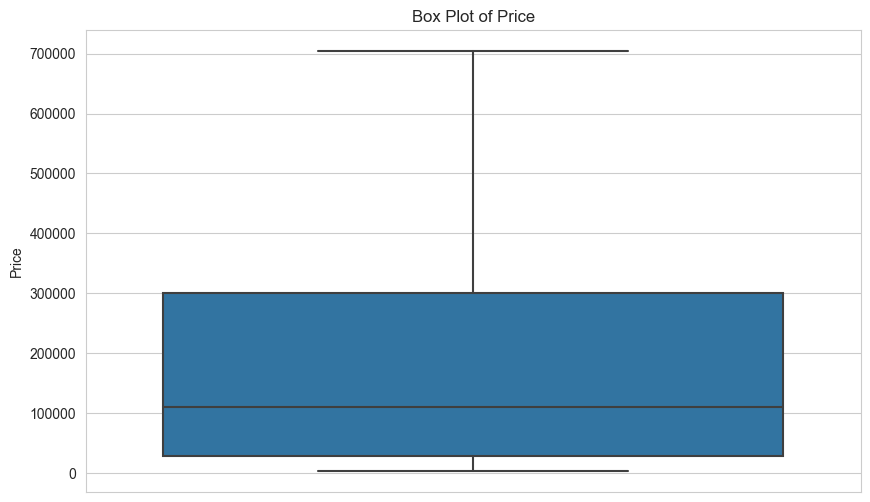

In [23]:
#box plot for price column after removing outliers
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='price')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

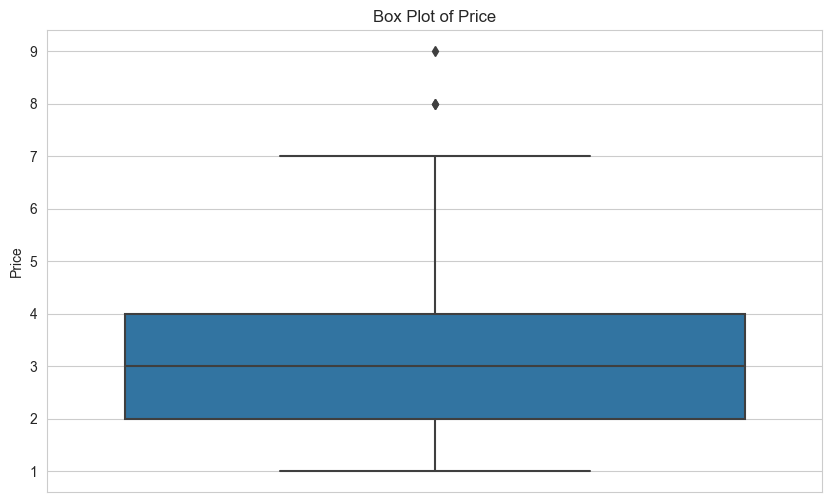

In [24]:
#box plot for bhk column after removing outliers
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='bhk')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [25]:
df["bhk"].value_counts()

bhk
3    1907
4    1186
2     753
1     549
5     397
6       7
8       2
7       1
9       1
Name: count, dtype: int64

In [26]:
df.shape

(4803, 10)

In [27]:
df.head()

,location,price,numBathrooms,numBalconies,Status,bhk,Type,Size,bath,balcony
0,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment,400.0,1.0,1.0
1,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment,400.0,1.0,1.0
2,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor,500.0,1.0,2.0
3,Model Town,48000,3.0,NaN,Furnished,3,House,1.0,3.0,3.0
4,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment,810.0,2.0,2.0


In [28]:
df["Status"].value_counts()

Status
Unfurnished       2155
Semi-Furnished    1915
Furnished          733
Name: count, dtype: int64

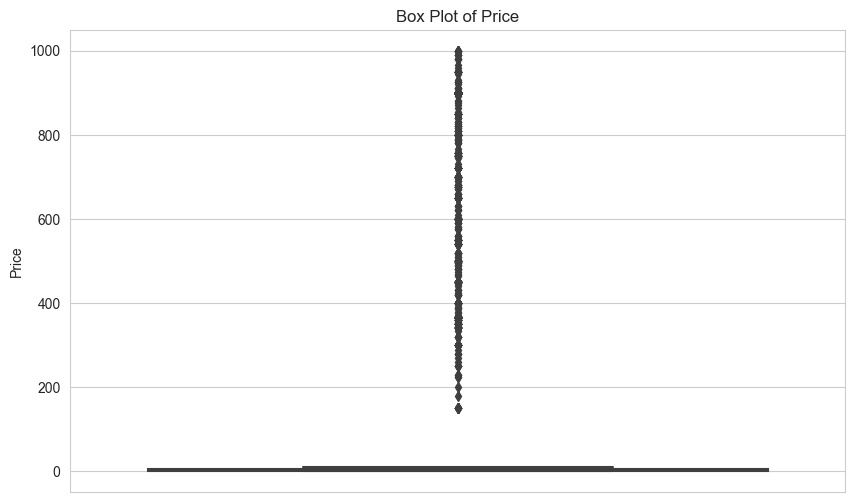

In [29]:
#box plot for size column
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Size')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [30]:
# this column has many misleading values and outliers hence it is appropriate to drop this column

In [31]:
df = df.drop(["Size"],axis = 1)

In [32]:
df.head()

,location,price,numBathrooms,numBalconies,Status,bhk,Type,bath,balcony
0,Kalkaji,22000,1.0,NaN,Furnished,1,Apartment,1.0,1.0
1,Mansarover Garden,20000,1.0,NaN,Furnished,1,Apartment,1.0,1.0
2,Uttam Nagar,8500,1.0,NaN,Semi-Furnished,2,Floor,1.0,2.0
3,Model Town,48000,3.0,NaN,Furnished,3,House,3.0,3.0
4,Sector 13 Rohini,20000,2.0,NaN,Unfurnished,2,Apartment,2.0,2.0


In [33]:
df = df.drop(["numBathrooms","numBalconies"], axis = 1)

In [34]:
df.head()

,location,price,Status,bhk,Type,bath,balcony
0,Kalkaji,22000,Furnished,1,Apartment,1.0,1.0
1,Mansarover Garden,20000,Furnished,1,Apartment,1.0,1.0
2,Uttam Nagar,8500,Semi-Furnished,2,Floor,1.0,2.0
3,Model Town,48000,Furnished,3,House,3.0,3.0
4,Sector 13 Rohini,20000,Unfurnished,2,Apartment,2.0,2.0


In [35]:
df["location"].value_counts()

location
Defence Colony        188
Greater kailash 1     153
Chattarpur            145
Vasant Vihar          139
Safdarjung Enclave    118
                     ... 
Ansari Nagar West       1
Sat Bari                1
Kailash hills           1
Soami Nagar             1
dda flat                1
Name: count, Length: 275, dtype: int64

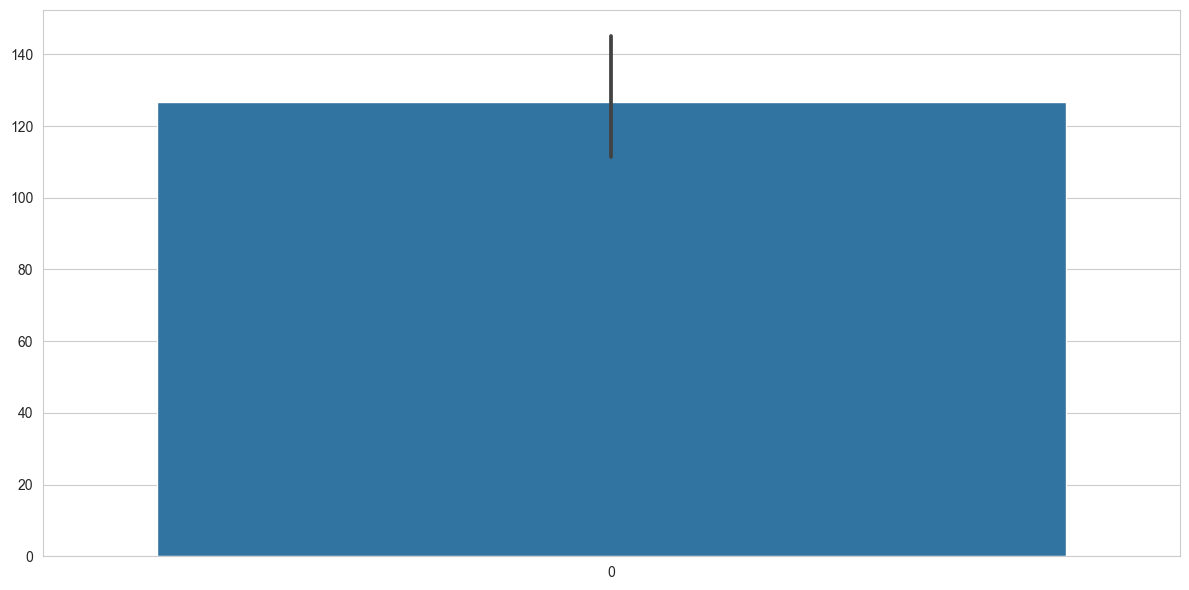

In [36]:
#barplot for location
plt.figure(figsize=(12,6))
sns.barplot(df["location"].value_counts().head(10))
plt.tight_layout()
plt.show()

In [37]:
df.groupby("location").price.describe().reset_index()

,location,count,mean,std,min,25%,50%,75%,max
0,AGCR Enclave,2.0,42000.000000,0.000000,42000.0,42000.0,42000.0,42000.0,42000.0
1,Abul Fazal Enclave Jamia Nagar,3.0,14833.333333,1755.942292,13000.0,14000.0,15000.0,15750.0,16500.0
2,Ajmeri Gate,2.0,21000.000000,4242.640687,18000.0,19500.0,21000.0,22500.0,24000.0
3,Alaknanda,2.0,15500.000000,6363.961031,11000.0,13250.0,15500.0,17750.0,20000.0
4,Amritpuri,3.0,11000.000000,0.000000,11000.0,11000.0,11000.0,11000.0,11000.0
...,...,...,...,...,...,...,...,...,...
270,i p extension patparganj,5.0,20400.000000,3781.534080,18000.0,18000.0,19000.0,20000.0,27000.0
271,laxmi nagar,23.0,18130.434783,3850.080847,6500.0,20000.0,20000.0,20000.0,20000.0
272,masoodpur,2.0,28000.000000,9899.494937,21000.0,24500.0,28000.0,31500.0,35000.0
273,mayur vihar phase 1,9.0,27111.111111,10231.012223,13500.0,20000.0,24000.0,40000.0,40000.0


In [38]:
df.groupby("location").price.mean().sort_values()

location
Sector 34 Rohini         3600.000000
dda flat                 4500.000000
Santnagar                4999.000000
Shakurpur Colony         5000.000000
Burari                   5833.333333
                           ...      
Shanti Niketan         401820.880000
Ghitorni               402639.021739
Sainik Farm            420364.973333
Sat Bari               600000.000000
Vasant Kunj Enclave    700000.000000
Name: price, Length: 275, dtype: float64

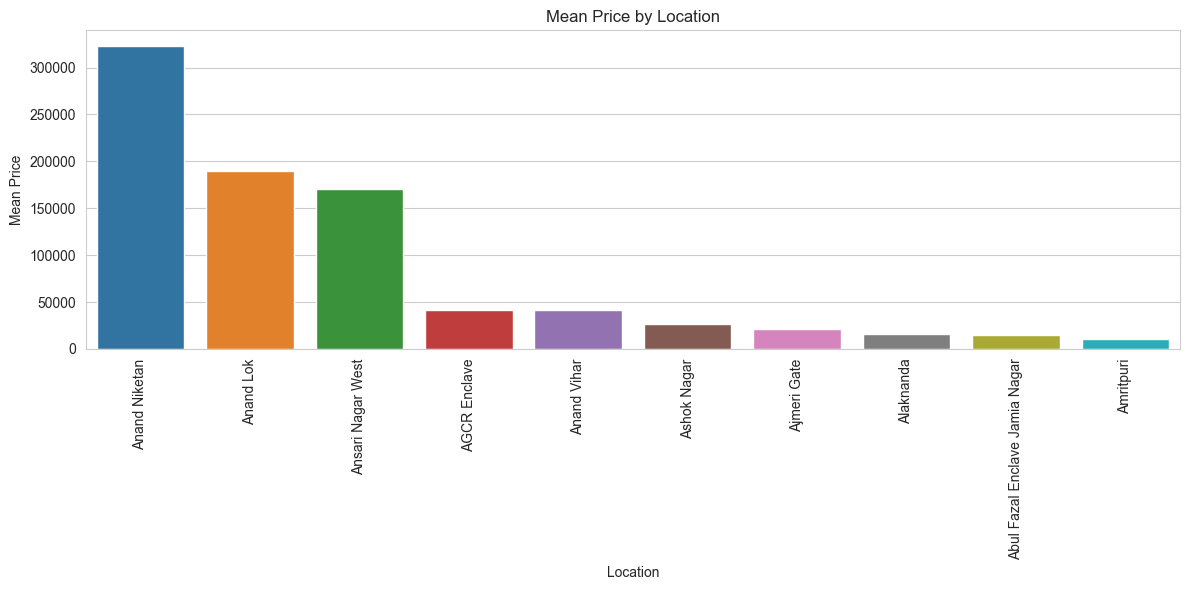

In [39]:
mean_prices = df.groupby('location')['price'].mean().reset_index().head(10)
mean_prices_sorted = mean_prices.sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='price', data=mean_prices_sorted)
plt.title('Mean Price by Location')
plt.xlabel('Location')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

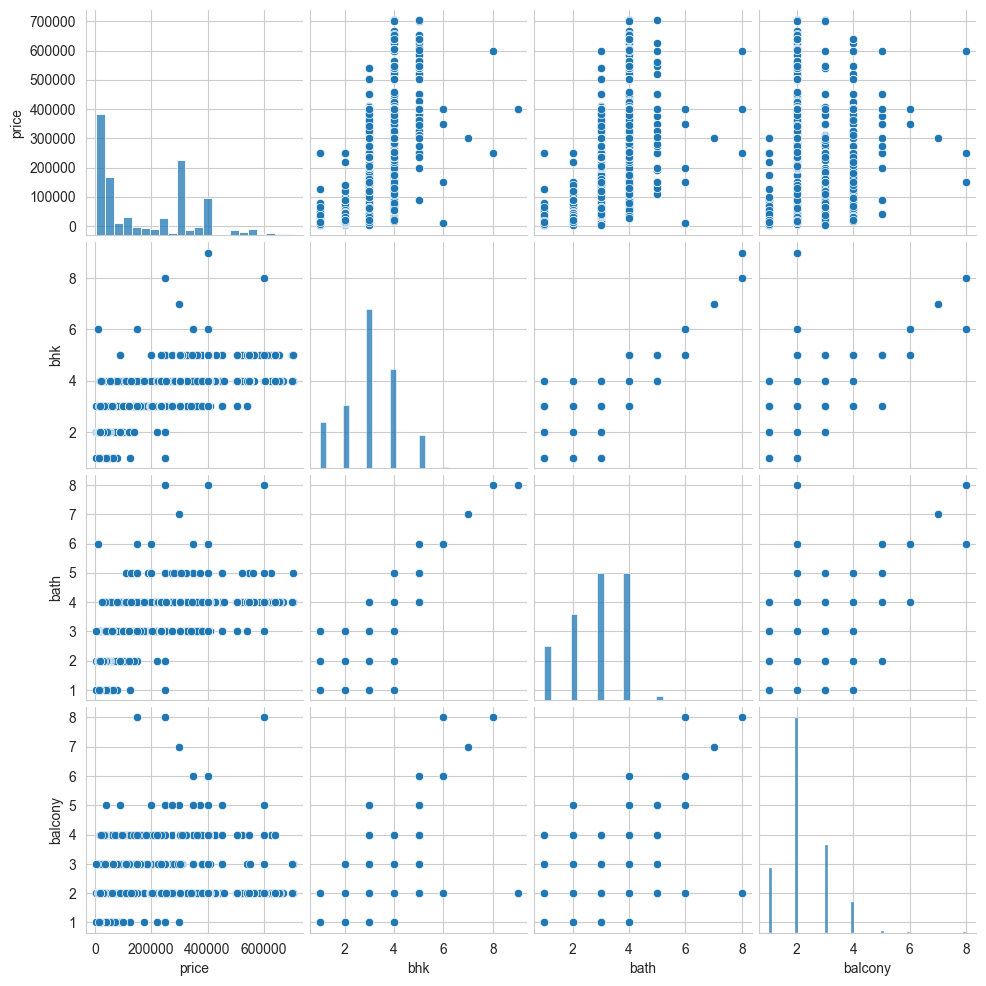

In [40]:
sns.pairplot(df)
plt.show()

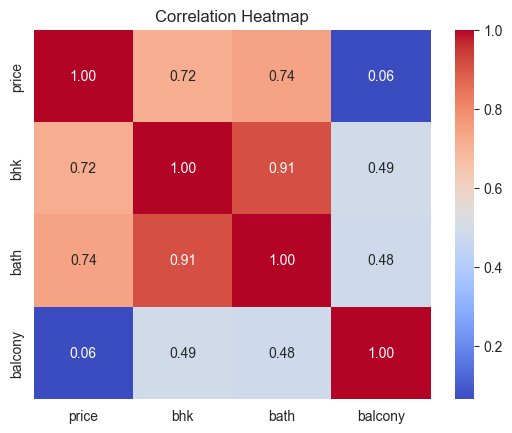

In [41]:
numerical_columns = df.select_dtypes(include=['int64', 'float64','int'])
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

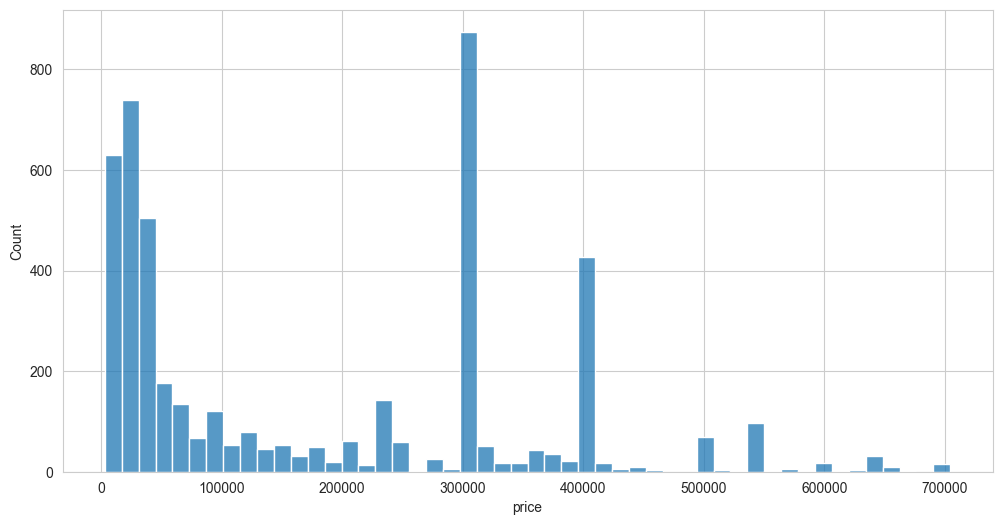

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df["price"],bins=50)
plt.show()

# Scaling the data

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
numerical_columns = ["price"]
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [44]:
df.head()

,location,price,Status,bhk,Type,bath,balcony
0,Kalkaji,0.027088,Furnished,1,Apartment,1.0,1.0
1,Mansarover Garden,0.024237,Furnished,1,Apartment,1.0,1.0
2,Uttam Nagar,0.007841,Semi-Furnished,2,Floor,1.0,2.0
3,Model Town,0.064157,Furnished,3,House,3.0,3.0
4,Sector 13 Rohini,0.024237,Unfurnished,2,Apartment,2.0,2.0


In [45]:
df['location'].nunique()

275

In [46]:
df['Status'].nunique()

3

In [47]:
df['Status'].value_counts()

Status
Unfurnished       2155
Semi-Furnished    1915
Furnished          733
Name: count, dtype: int64

In [48]:
df['Type'].nunique()

5

In [49]:
df['Type'].value_counts()

Type
Floor        3258
Apartment     986
Villa         322
House         236
penthouse       1
Name: count, dtype: int64

# One Hot Encoding for categorical variables

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le_location = LabelEncoder()
df['location'] = le_location.fit_transform(df['location'])
df['location'].dtype

dtype('int32')

In [52]:
le_Status = LabelEncoder()
df['Status'] = le_Status.fit_transform(df['Status'])
df['Status'].dtype

dtype('int32')

In [53]:
le_Type = LabelEncoder()
df['Type'] = le_Type.fit_transform(df['Type'])
df['Type'].dtype

dtype('int32')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  4803 non-null   int32  
 1   price     4803 non-null   float64
 2   Status    4803 non-null   int32  
 3   bhk       4803 non-null   int32  
 4   Type      4803 non-null   int32  
 5   bath      4803 non-null   float64
 6   balcony   4803 non-null   float64
dtypes: float64(3), int32(4)
memory usage: 225.1 KB


In [55]:
df.head()

,location,price,Status,bhk,Type,bath,balcony
0,84,0.027088,0,1,0,1.0,1.0
1,115,0.024237,0,1,0,1.0,1.0
2,247,0.007841,1,2,1,1.0,2.0
3,124,0.064157,0,3,2,3.0,3.0
4,191,0.024237,2,2,0,2.0,2.0


# MODEL TRAINING AND TESTING

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop(columns=['price'])
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
X.head()

,location,Status,bhk,Type,bath,balcony
0,84,0,1,0,1.0,1.0
1,115,0,1,0,1.0,1.0
2,247,1,2,1,1.0,2.0
3,124,0,3,2,3.0,3.0
4,191,2,2,0,2.0,2.0


In [59]:
Y.head()

0    0.027088
1    0.024237
2    0.007841
3    0.064157
4    0.024237
Name: price, dtype: float64

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [62]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [63]:
Y_predicted = rf.predict(X_test)

In [64]:
rf.score(X_test,Y_test)

0.8866603310883823

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
mse = mean_squared_error(Y_test, Y_predicted)
r2 = r2_score(Y_test, Y_predicted)
print(f"MSE: {mse}, R2 Score: {r2}")

MSE: 0.006349603877957185, R2 Score: 0.8866603310883823


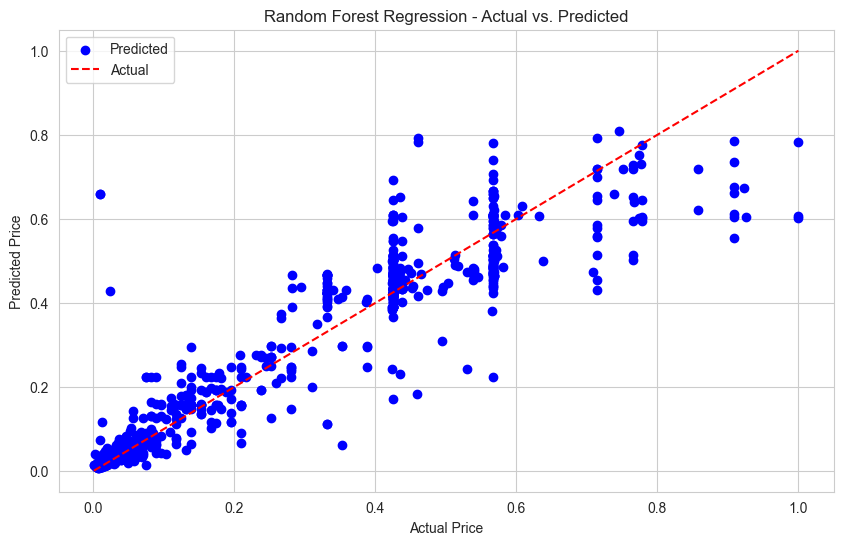

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_predicted, color='blue', label='Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Actual')
plt.title("Random Forest Regression - Actual vs. Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()

In [68]:
# testing the model

In [69]:
XINPUT = np.array([['Hauz Khas','Semi-Furnished',3,'Villa',2,3]])
XINPUT

array([['Hauz Khas', 'Semi-Furnished', '3', 'Villa', '2', '3']],
      dtype='<U14')

In [70]:
XINPUT[:,0]=le_location.transform(XINPUT[:,0])
XINPUT[:,1]=le_Status.transform(XINPUT[:,1])
XINPUT[:,3]=le_Type.transform(XINPUT[:,3])
XINPUT=XINPUT.astype('float')

In [74]:
rf.predict(XINPUT)

array([0.09838161])

In [75]:
# convert this price in lacs by multiplying it by 1000
rf.predict(XINPUT) * 1000

array([98.38160707])

# Loading appropriate model and class objects into pickle file

In [77]:
import pickle

In [78]:
data = {"model":rf, "le_location":le_location, "le_Status":le_Status, "le_Type":le_Type}
with open('saved_steps_of_delhi_prediction.pkl','wb') as file:
    pickle.dump(data,file)

In [79]:
with open('saved_steps_of_delhi_prediction.pkl','rb') as file:
    data = pickle.load(file)
    
random_forest_regressor = data["model"]
le_location = data["le_location"]
le_Status = data["le_Status"]
le_Type = data["le_Type"]

In [81]:
random_forest_regressor.predict(XINPUT)

array([0.09838161])

In [82]:
random_forest_regressor.predict(XINPUT) * 1000

array([98.38160707])